<h2>Red Squirrel Diet Study</h2>

The basis of this study is to work with visualizations using either the Seaborn or Plotly libraries and to recreate the scatterplot below.

<h3>Project Guidelines:</h3>

**Recreate the original plot as closely as possible**
<ul>
<li>Title and axis labels</li>
<li>Axis ticks and ranges</li>
<li>Legend</li>
<li>Magenta and green data points (colors don’t need to be exact)</li>
<li>Grouping and presentation of the data</li>
</ul>    

This will be accomplished through a combination of functions and parameters that you’ve learned in this course, along with some that you didn’t. Independant research will also be used to accomplish certain formatting


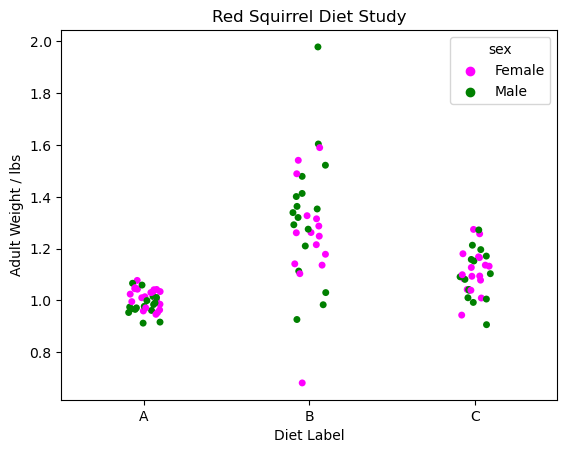

In [1]:
import seaborn as sns #imports seaborn for plotting data

In [2]:
import matplotlib.pyplot as plt

In [3]:
import pandas as pd  #importing Pandas

In [4]:
try:
    squirrels = pd.read_csv('squirrel_diet.csv')  #bring in the squirrel data set
    
except:
    squirrels = pd.read_csv('/datasets/squirrel_diet.csv')

In [5]:
squirrels.info() #quick visual for information on dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     100 non-null    int64  
 1   diet    100 non-null    int64  
 2   weight  100 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 2.5 KB


In [6]:
squirrels.head() #brief visual of data

,sex,diet,weight
0,0,3,1.042
1,1,3,1.196
2,1,2,1.401
3,1,1,1.015
4,0,2,1.141


The code below is used to create an additional column where the 1s and 0s are transformed into string variables "female & male"

In [7]:
#Creates text based gender column based on the sex column
def squirrel_gender(sex):
    if sex == 1:
        return 'Male' #assisgns 'Male' to 1
    else:
        return 'Female'

squirrels['squirrel_gender'] = squirrels['sex'].apply(squirrel_gender) #adds new 'squirrel_gender' row to df

print(squirrels.head(10))

   sex  diet  weight squirrel_gender
0    0     3   1.042          Female
1    1     3   1.196            Male
2    1     2   1.401            Male
3    1     1   1.015            Male
4    0     2   1.141          Female
5    1     2   1.113            Male
6    1     3   1.213            Male
7    0     3   1.132          Female
8    0     1   1.034          Female
9    0     1   1.045          Female


In [8]:
#Creates text based diet letters which correlate to the original diet numbers. Adds the new diet letters to a new column
def dietary_labels(diet):
    if diet == 1:
        return 'A'
    elif diet == 2:
        return 'B'
    else:
        return 'C'

squirrels['dietary_labels'] = squirrels['diet'].apply(dietary_labels)

print(squirrels.head(10))

   sex  diet  weight squirrel_gender dietary_labels
0    0     3   1.042          Female              C
1    1     3   1.196            Male              C
2    1     2   1.401            Male              B
3    1     1   1.015            Male              A
4    0     2   1.141          Female              B
5    1     2   1.113            Male              B
6    1     3   1.213            Male              C
7    0     3   1.132          Female              C
8    0     1   1.034          Female              A
9    0     1   1.045          Female              A


In [9]:
color_dict = dict({'Female': 'magenta',
                    'Male': 'green'}) #set legend colors

This sets our custom colors for the legend variables

Text(0, 0.5, 'Adult Weight/lbs')

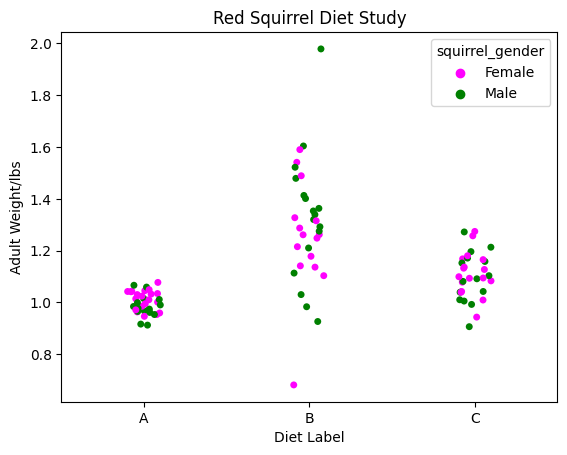

In [10]:
hue_order = ['Female', 'Male'] #sets the legend variable order
sns.stripplot(x="dietary_labels", 
              y="weight", 
              hue="squirrel_gender", #call created gender column
              palette=color_dict, #calls in custom colors from color_dict variable we created
              order = ['A','B','C'], #changes order of x axis labels
              data=squirrels,
              hue_order=hue_order).set(title='Red Squirrel Diet Study') #adds the legend order and title
plt.xlabel('Diet Label') #creates custom x-axis label with matplotlib
plt.ylabel('Adult Weight/lbs') #creates custom y-axis label with matplotlib

"hue_order" was used before calling the scatter plot as the original plot had 'male' first and not 'female' in the legend.

<b>Insight:</b> The plot shows that squirrels that were fed diet 'B' had a higher adult weight than the other two diets. There are two anomolies wtih the B diet: one of the female squirrels had the lowest weight out of either diet and one of the male squirrels had the highest weight out of either diet. 

It would be interesting to see what conditions the squirrels were kept in and the overall health status of the female that had the lowest weight.